# Exploratory Data Analysis
## Titanic

In [4]:
import seaborn as sns
import pandas as pd

# Load the Titanic dataset
df = sns.load_dataset('titanic')



##  Data Overview
Displayed the first few rows and checked the structure and summary statistics of the dataset.

In [5]:

# Display the first few rows of the dataset
df.head(7)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True


In [6]:
# Get an overview of the dataset's structure
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [7]:

# Summary statistics of numerical variables
print(df.describe())


         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [8]:

# Summary statistics of categorical variables
df.describe(include='object')

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


##  Handling Missing Values
Identified and handled missing values appropriately.

In [9]:
# Check for missing values
print(df.isnull().sum())


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [10]:

# Fill missing values in 'age' with the median age
df['age'] = df['age'].fillna(df['age'].median())

print(df.isnull().sum())


survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [11]:
# Fill missing values in 'embarked' with the mode
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Verify that there are no missing values
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [12]:

# Drop the 'deck' column due to too many missing values
df = df.drop(columns=['deck'])

# Verify that there are no missing values
print(df.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64


In [13]:
# Fill missing values in 'embark_town' with the mode
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

# Verify that there are no missing values
print(df.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


## Univariate Analysis
Performed univariate analysis on numerical and categorical variables.
### Numerical Variables

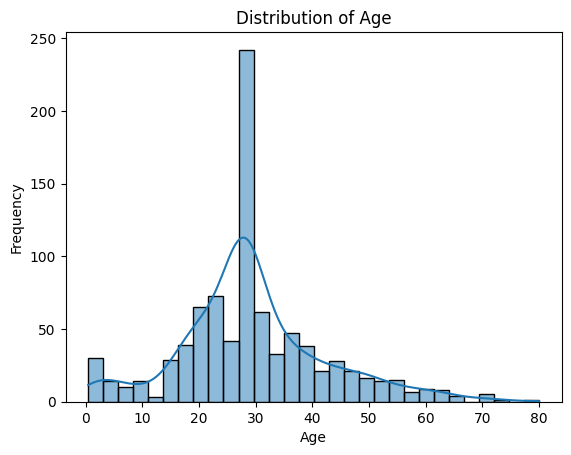

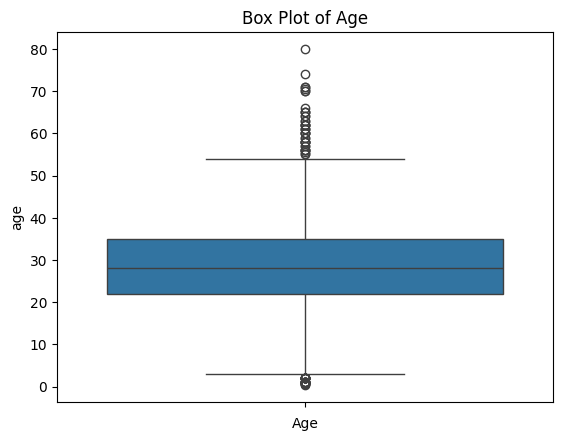

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64
Skewness of age: 0.5102446555756495
Kurtosis of age: 0.9938710163801736


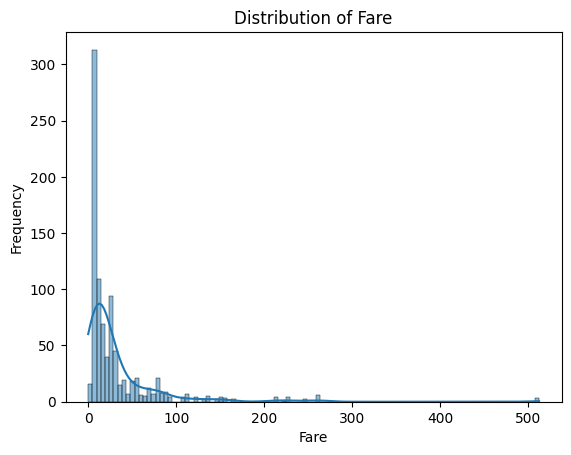

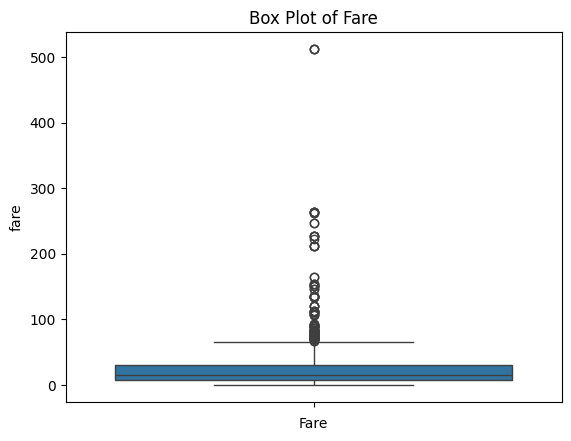

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64
Skewness of fare: 4.787316519674893
Kurtosis of fare: 33.39814088089868


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of age
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Box plot of age
sns.boxplot(df['age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

# Summary statistics for age
print(df['age'].describe())

# Skewness and Kurtosis
print("Skewness of age:", df['age'].skew())
print("Kurtosis of age:", df['age'].kurt())

# Distribution of fare
sns.histplot(df['fare'], kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Box plot of fare
sns.boxplot(df['fare'])
plt.title('Box Plot of Fare')
plt.xlabel('Fare')
plt.show()

# Summary statistics for fare
print(df['fare'].describe())

# Skewness and Kurtosis
print("Skewness of fare:", df['fare'].skew())
print("Kurtosis of fare:", df['fare'].kurt())


### Categorical Variables

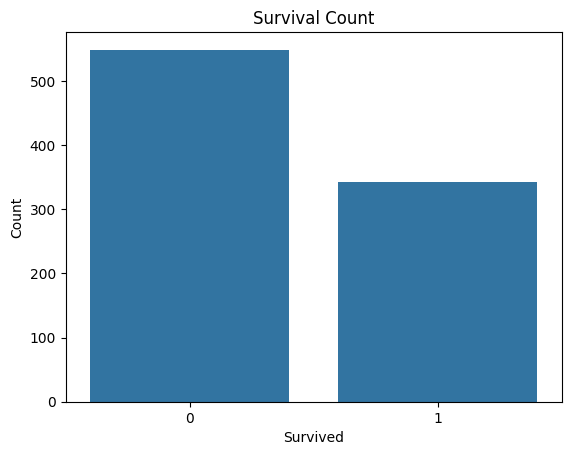

Survival Rate: 0.38


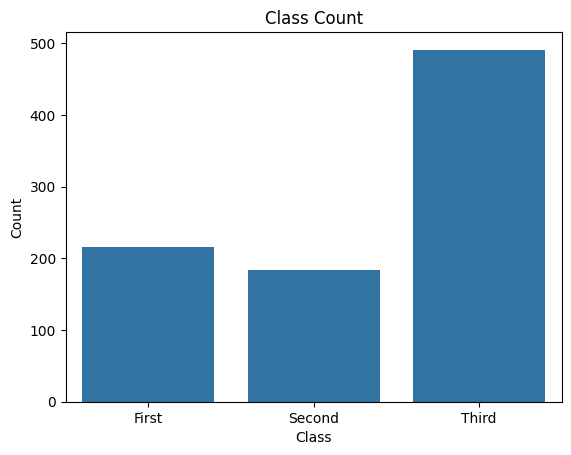

class
Third     0.551066
First     0.242424
Second    0.206510
Name: proportion, dtype: float64


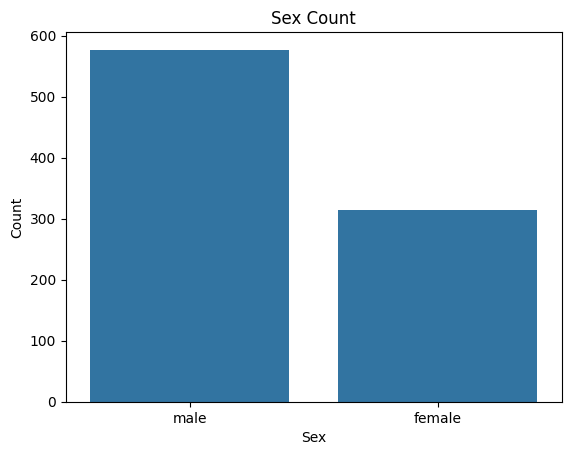

sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64


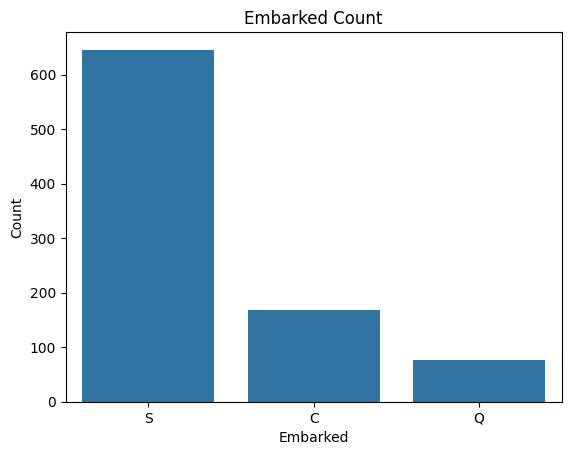

embarked
S    0.725028
C    0.188552
Q    0.086420
Name: proportion, dtype: float64


In [15]:
# Count plot for survival
sns.countplot(data=df, x='survived')
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Survival rate
survival_rate = df['survived'].mean()
print(f"Survival Rate: {survival_rate:.2f}")

# Count plot for class
sns.countplot(data=df, x='class')
plt.title('Class Count')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Proportion of each class
class_proportion = df['class'].value_counts(normalize=True)
print(class_proportion)

# Count plot for sex
sns.countplot(data=df, x='sex')
plt.title('Sex Count')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Proportion of each sex
sex_proportion = df['sex'].value_counts(normalize=True)
print(sex_proportion)

# Count plot for embarked
sns.countplot(data=df, x='embarked')
plt.title('Embarked Count')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

# Proportion of each embarkation point
embarked_proportion = df['embarked'].value_counts(normalize=True)
print(embarked_proportion)


## Bivariate Analysis

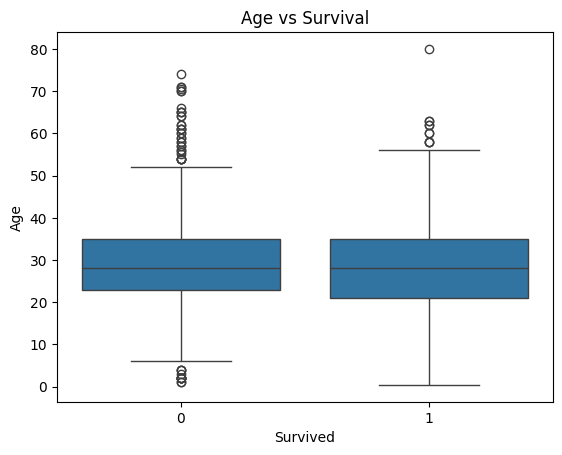

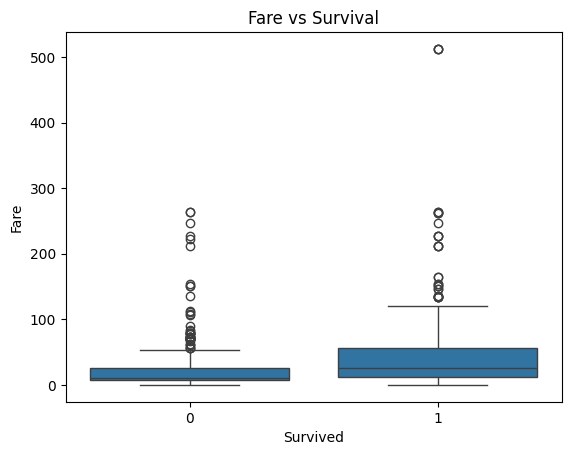

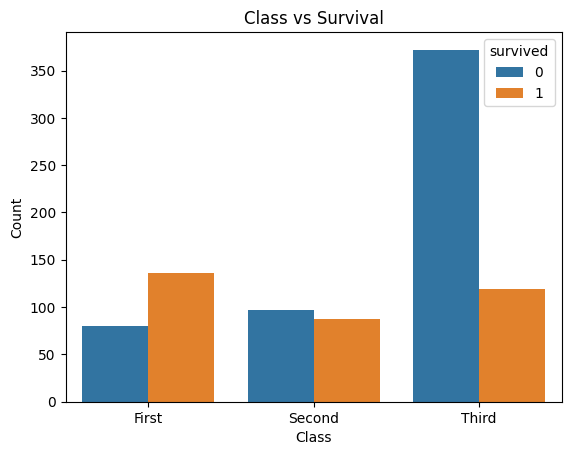

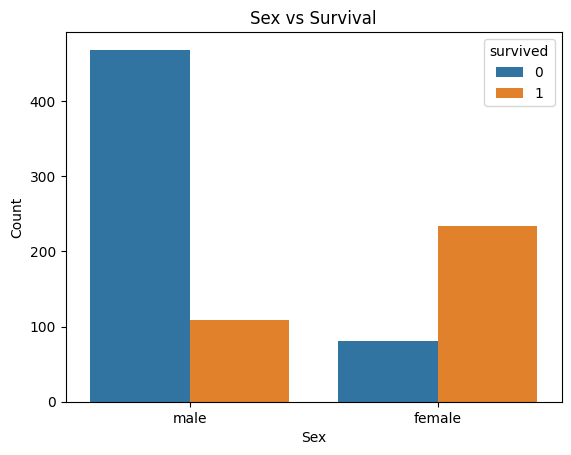

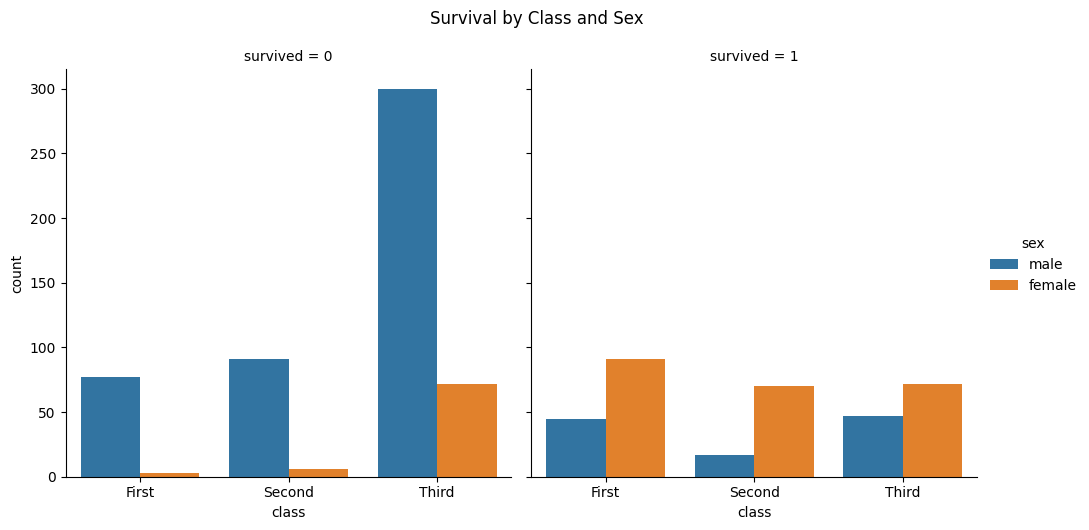

In [16]:
sns.boxplot(data=df, x='survived', y='age')
plt.title('Age vs Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()


sns.boxplot(data=df, x='survived', y='fare')
plt.title('Fare vs Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()


sns.countplot(data=df, x='class', hue='survived')
plt.title('Class vs Survival')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


sns.countplot(data=df, x='sex', hue='survived')
plt.title('Sex vs Survival')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


sns.catplot(data=df, x='class', hue='sex', col='survived', kind='count')
plt.suptitle('Survival by Class and Sex', y=1.05)
plt.show()


## Multivariate Analysis

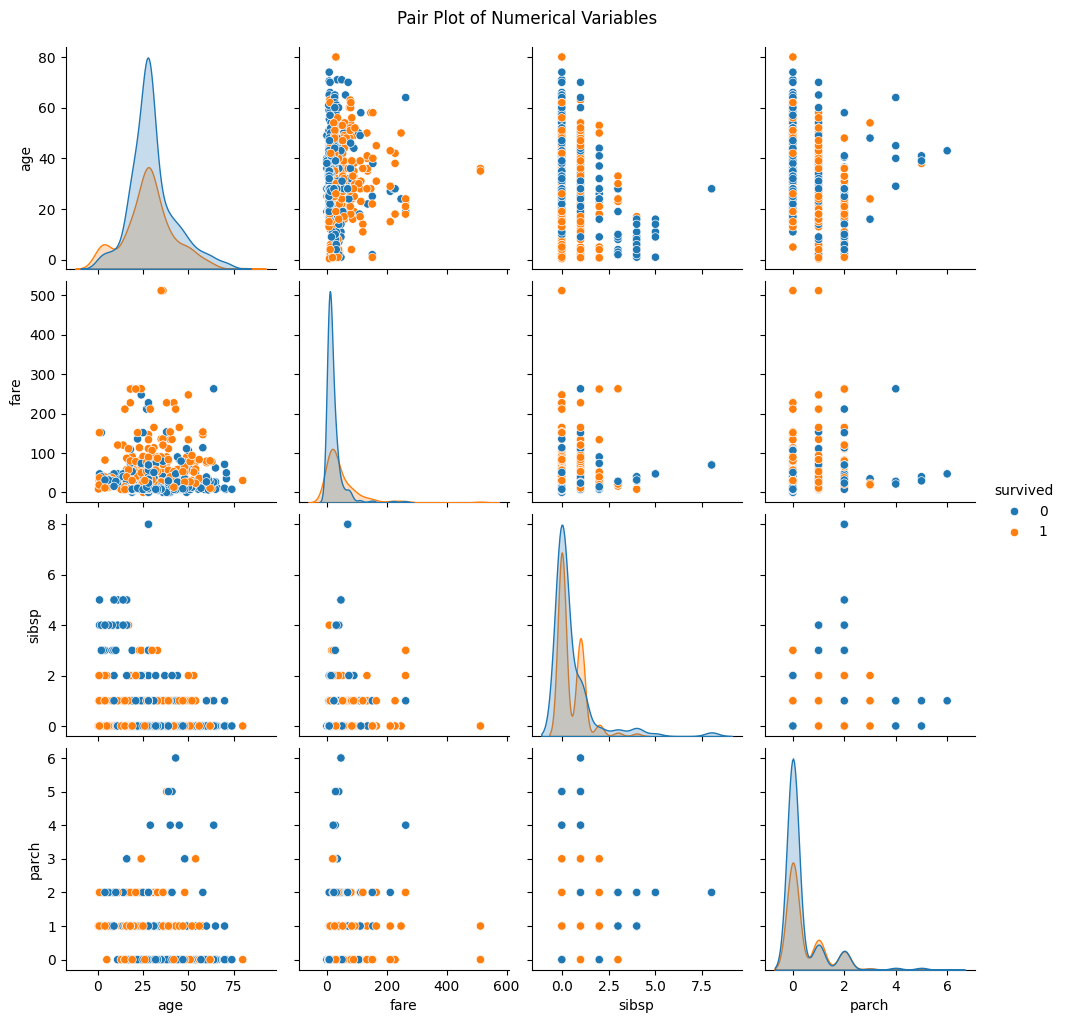

In [18]:
# Pair plot of select numerical variables
sns.pairplot(df[['age', 'fare', 'sibsp', 'parch', 'survived']], hue='survived')
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()


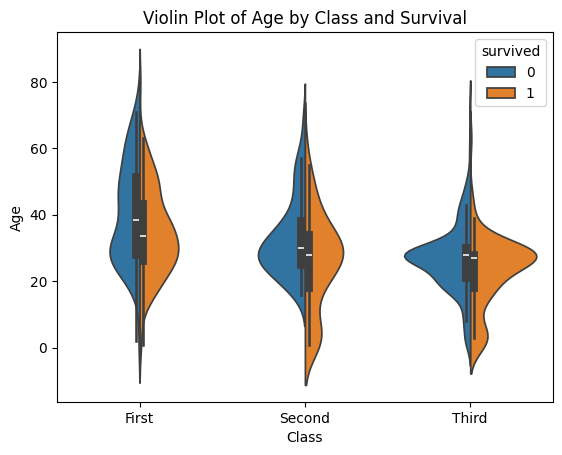

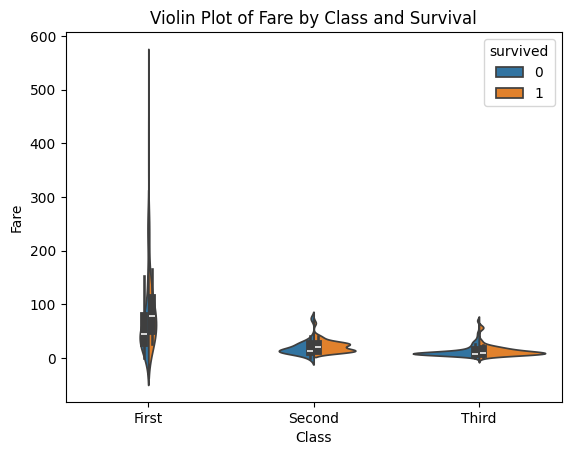

In [20]:
# Violin plot of age by class and survival
sns.violinplot(data=df, x='class', y='age', hue='survived', split=True)
plt.title('Violin Plot of Age by Class and Survival')
plt.xlabel('Class')
plt.ylabel('Age')
plt.show()

# Violin plot of fare by class and survival
sns.violinplot(data=df, x='class', y='fare', hue='survived', split=True)
plt.title('Violin Plot of Fare by Class and Survival')
plt.xlabel('Class')
plt.ylabel('Fare')
plt.show()


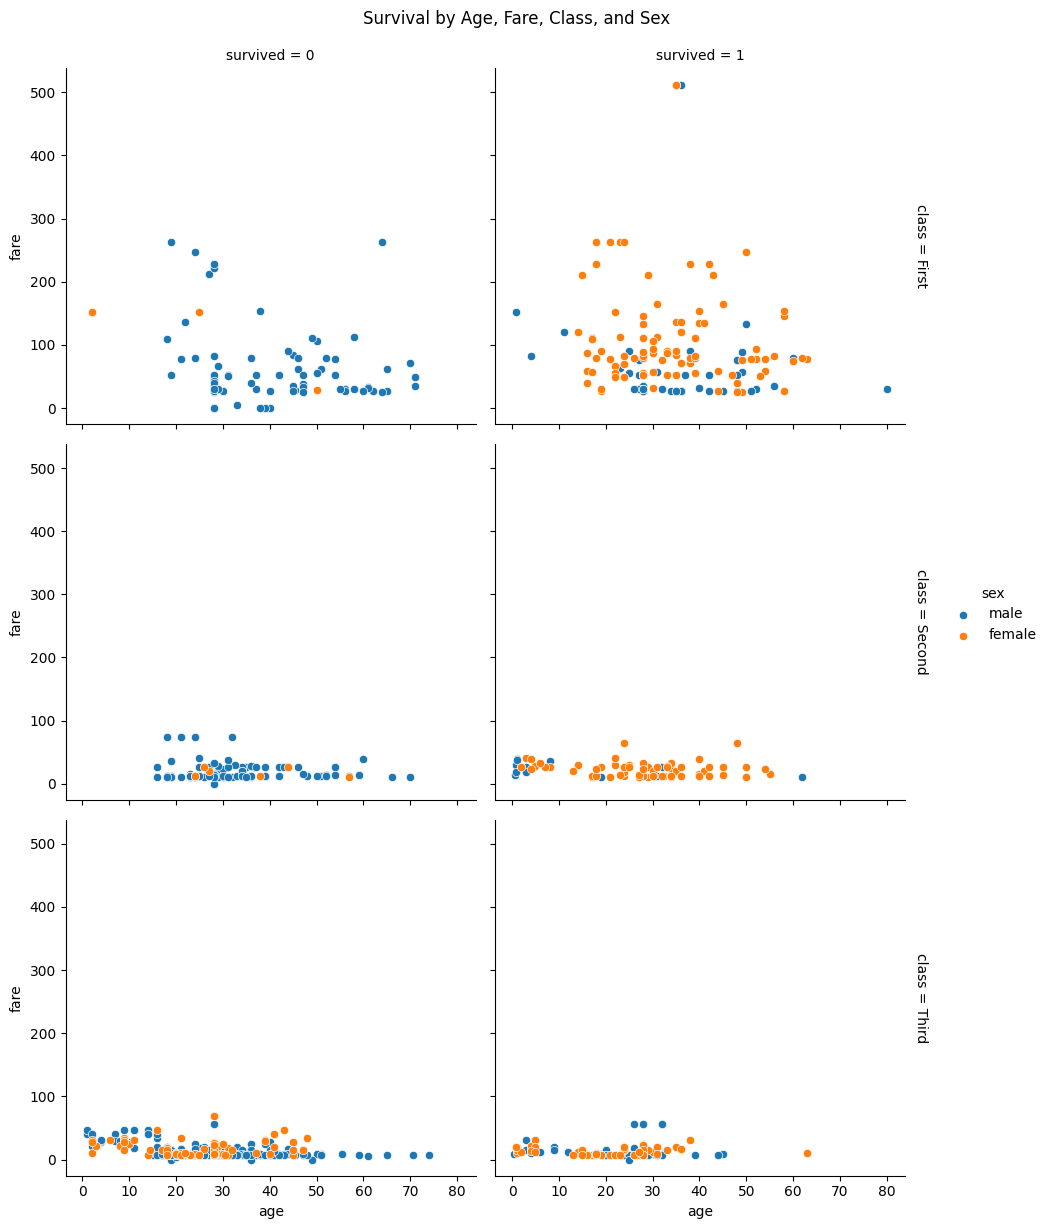

In [21]:
# FacetGrid of survival by age and fare
g = sns.FacetGrid(df, col='survived', row='class', hue='sex', margin_titles=True, height=4, aspect=1.2)
g.map(sns.scatterplot, 'age', 'fare')
g.add_legend()
plt.suptitle('Survival by Age, Fare, Class, and Sex', y=1.02)
plt.show()


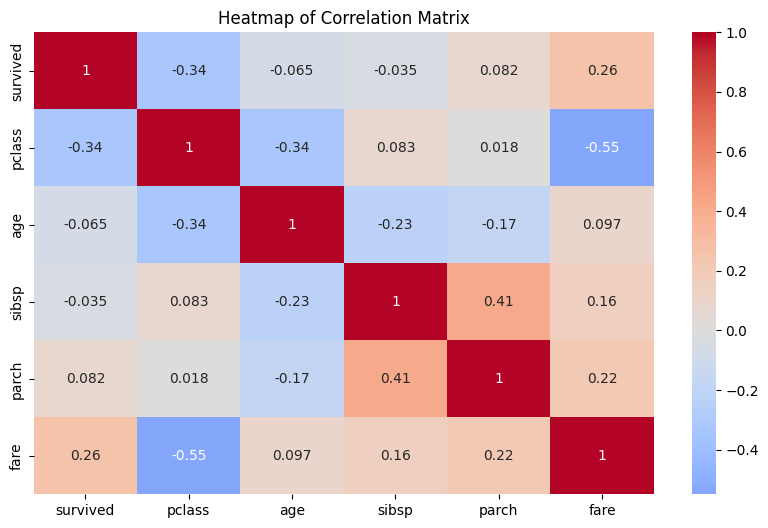

In [23]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Correlation Matrix')
plt.show()


### Saving into another file.

In [33]:
# Save the DataFrame to a CSV file
df.to_csv('titanic_dataset.csv', index=False)
